In [1]:
import sympy as sp
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu, p_ba, p_pa = sp.symbols('mu p_ba p_pa')
display(mu, p_ba, p_pa)

mu

p_ba

p_pa

In [3]:
# Initial distribution
x0 = sp.Matrix([mu, 1 - mu, 0])
x0

Matrix([
[    mu],
[1 - mu],
[     0]])

In [4]:
B = sp.Matrix([
  [1- p_ba, 0, 0   ],
  [p_ba, 1, 0 ],
  [0, 0, 1 ]])

B

Matrix([
[1 - p_ba, 0, 0],
[    p_ba, 1, 0],
[       0, 0, 1]])

In [5]:
P = sp.Matrix([
    [1,        0, 0],
    [0, 1 - p_pa, 0],
    [0,      p_pa, 1]
])
P

Matrix([
[1,        0, 0],
[0, 1 - p_pa, 0],
[0,     p_pa, 1]])

In [6]:
F = sp.Matrix([
  [1-p_ba, 0, 0],
  [p_ba, 1-p_pa, 0],
  [0, p_pa,1]
])
F

Matrix([
[1 - p_ba,        0, 0],
[    p_ba, 1 - p_pa, 0],
[       0,     p_pa, 1]])

In [7]:
x1_B = (B*x0)
x2_B = (B*x1_B)
display(x1_B, x2_B)

Matrix([
[   mu*(1 - p_ba)],
[mu*p_ba - mu + 1],
[               0]])

Matrix([
[                     mu*(1 - p_ba)**2],
[mu*p_ba*(1 - p_ba) + mu*p_ba - mu + 1],
[                                    0]])

In [8]:
x1_P = (P*x0)
x2_P = (P*x1_P)
display(x1_P, x2_P)

Matrix([
[                 mu],
[(1 - mu)*(1 - p_pa)],
[      p_pa*(1 - mu)]])

Matrix([
[                                      mu],
[                  (1 - mu)*(1 - p_pa)**2],
[p_pa*(1 - mu)*(1 - p_pa) + p_pa*(1 - mu)]])

In [9]:
x1_BP = (B*x0)
x2_BP = (P*x1_BP)
display(x1_BP, x2_BP)

Matrix([
[   mu*(1 - p_ba)],
[mu*p_ba - mu + 1],
[               0]])

Matrix([
[                mu*(1 - p_ba)],
[(1 - p_pa)*(mu*p_ba - mu + 1)],
[      p_pa*(mu*p_ba - mu + 1)]])

In [10]:
x1_F = (F*x0)
x2_F = (F*x1_F)
display(x1_F, x2_F)

Matrix([
[                mu*(1 - p_ba)],
[mu*p_ba + (1 - mu)*(1 - p_pa)],
[                p_pa*(1 - mu)]])

Matrix([
[                                               mu*(1 - p_ba)**2],
[mu*p_ba*(1 - p_ba) + (1 - p_pa)*(mu*p_ba + (1 - mu)*(1 - p_pa))],
[           p_pa*(1 - mu) + p_pa*(mu*p_ba + (1 - mu)*(1 - p_pa))]])

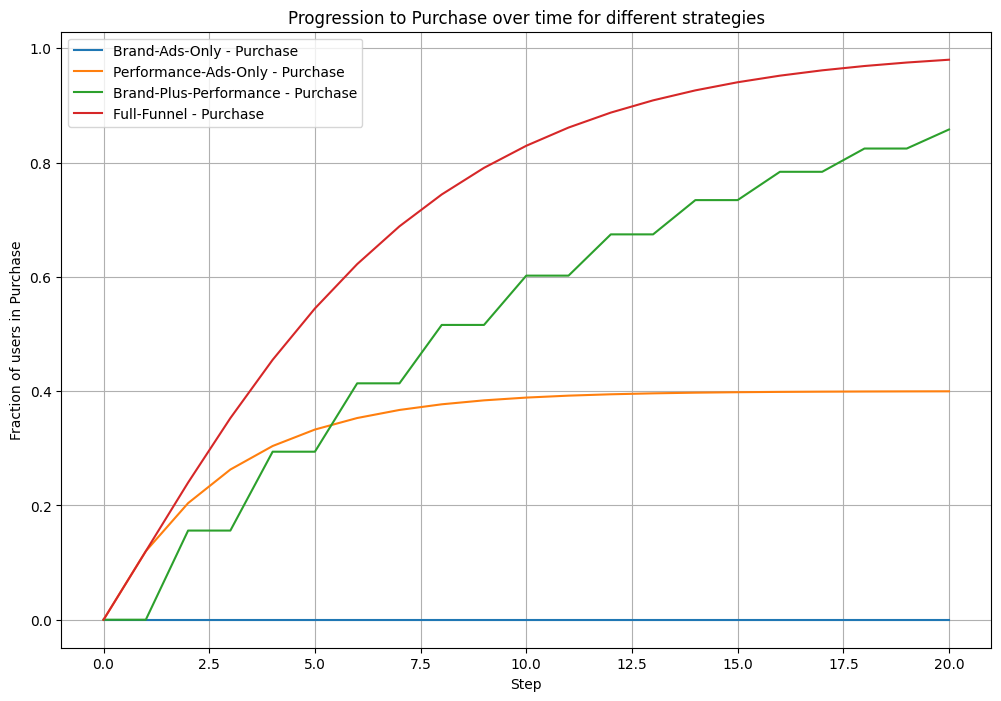

In [11]:
# Parameters
mu = 0.6      # fraction initially Not Aware
p_ba = 0.2    # Brand ad conversion
p_pa = 0.3    # Performance ad conversion
steps = 20    # Number of time steps

# Initial distribution
x0 = np.array([mu, 1-mu, 0])

# Transition matrices
B = np.array([
    [1-p_ba, 0, 0],
    [p_ba, 1, 0],
    [0, 0, 1]
])

P_mat = np.array([
    [1, 0, 0],
    [0, 1-p_pa, 0],
    [0, p_pa, 1]
])

F = np.array([
    [1-p_ba, 0, 0],
    [p_ba, 1-p_pa, 0],
    [0, p_pa, 1]
])

# Function to simulate repeated application of matrices
def simulate_steps(x0, matrices, steps):
    traj = [x0.copy()]
    x = x0.copy()
    n_mats = len(matrices)
    for i in range(steps):
        # Cycle through matrices (strategy can have multiple types)
        M = matrices[i % n_mats]
        x = M @ x
        traj.append(x.copy())
    return np.array(traj)

# Define strategies
strategies = {
    "Brand-Ads-Only": [B],
    "Performance-Ads-Only": [P_mat],
    "Brand-Plus-Performance": [B, P_mat],
    "Full-Funnel": [F]
}

# Run simulations
results = {}
for name, mats in strategies.items():
    results[name] = simulate_steps(x0, mats, steps)

# Plot results
plt.figure(figsize=(12, 8))
for name, traj in results.items():
    plt.plot(traj[:,2], label=f'{name} - Purchase')  # focus on Purchase fraction
plt.xlabel("Step")
plt.ylabel("Fraction of users in Purchase")
plt.title("Progression to Purchase over time for different strategies")
plt.legend()
plt.grid(True)
plt.show()
